# Preconditioners

## Packages

In [44]:
import torch
import gpytorch
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import os
import gpboost as gpb
import requests
import pandas as pd
import time

In [45]:
# Flag for toy example
toy = True

## Data

In [46]:
# URL of the raw CSV file on GitHub
url = 'https://raw.githubusercontent.com/TimGyger/FSVA/refs/heads/main/Simulation/Data/simulated_data_non_Gaussian_5.txt'

# Load the CSV file directly from the URL
df = pd.read_csv(url)

# Select the first 5 columns for X
X = df.iloc[:, :5]  # First 5 columns

# Select the last column for y
y = df.iloc[:, 5]  # Last column

# Convert to numpy:
X_np = X.to_numpy()
y_np = y.to_numpy()

if toy:
    X_np = X_np[1:10000,:]
    y_np = y_np[1:10000]

## FITC-Preconditioner experiments

### m = 200 & m_v = 30

In [13]:
# Different number of inducing points for FITC preconditioner
vector_ind_points = [10, 50, 100, 200, 300, 400, 500]
# Number of repetitions
num_rep = 100
if toy:
    num_rep = 10
# Zero matrices
matrix = np.zeros((len(vector_ind_points), num_rep))
matrix_t = np.zeros((len(vector_ind_points), num_rep))
# Nested loop to iterate over both vectors
for i, val1 in enumerate(vector_ind_points):
    for j in range(0, num_rep):
        print(i)
        print(j)
        # Start the timer
        start_time = time.time()
        # FSVecchia with euclidean-based neighbor search
        model_fsva = gpb.GPModel(gp_coords=X_np, cov_function="gaussian_ard", 
                                 likelihood="bernoulli_logit",num_neighbors = 30,num_ind_points = 200,ind_points_selection = "kmeans++",
                                 matrix_inversion_method = "iterative", gp_approx="full_scale_vecchia",seed = 2)
        model_fsva.set_optim_params(params={"cg_preconditioner_type": "predictive_process_plus_diagonal",
                                            "piv_chol_rank": val1, "seed_rand_vec_trace": j+1})
        neg_fsva = model_fsva.neg_log_likelihood(cov_pars = np.array([1.0, 0.15, 0.30,0.45,0.60,0.75]), y = y_np)
        matrix[i, j] = neg_fsva
        # End the timer
        end_time = time.time()

        # Calculate elapsed time in seconds
        matrix_t[i, j] = end_time - start_time
        

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 0.12181 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 i

[GPBoost] [Info] kNN time until = 0.045535 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[[6755.26068455 6746.30191878 6751.60641014 6747.84718178 6754.17588727
     0.            0.            0.            0.            0.        ]
 [   0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.        ]
 [   0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.        ]
 [   0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.        ]
 [   0.            0.            0.            0.            0.
     0.            0.            0.            0.      

[GPBoost] [Info] kNN time until = 0.044439 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[[6755.26068455 6746.30191878 6751.60641014 6747.84718178 6754.17588727
  6746.31306913 6754.82099415 6752.9924529  6756.26963559    0.        ]
 [   0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.        ]
 [   0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.        ]
 [   0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.        ]
 [   0.            0.            0.            0.            0.
     0.            0.            0.            0.      

[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 0.048997 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[[6755.26068455 6746.30191878 6751.60641014 6747.84718178 6754.17588727
  6746.31306913 6754.82099415 6752.9924529  6756.26963559 6750.08250386]
 [6755.13283852 6749.35319226 6751.69982856    0.            0.
     0.            0.            0.            0.            0.        ]
 [   0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.        ]
 [   0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.        ]
 [   0.            0.            0.            0.    

[GPBoost] [Info] kNN time until = 0.044455 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[[6755.26068455 6746.30191878 6751.60641014 6747.84718178 6754.17588727
  6746.31306913 6754.82099415 6752.9924529  6756.26963559 6750.08250386]
 [6755.13283852 6749.35319226 6751.69982856 6748.16529695 6752.11131835
  6749.15806306 6754.87772477    0.            0.            0.        ]
 [   0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.        ]
 [   0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.        ]
 [   0.            0.            0.            0.            0.
     0.            0.            0.            

[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 0.067519 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[[6755.26068455 6746.30191878 6751.60641014 6747.84718178 6754.17588727
  6746.31306913 6754.82099415 6752.9924529  6756.26963559 6750.08250386]
 [6755.13283852 6749.35319226 6751.69982856 6748.16529695 6752.11131835
  6749.15806306 6754.87772477 6750.16376623 6754.07707029 6748.7777247 ]
 [6754.76626868    0.            0.            0.            0.
     0.            0.            0.            0.            0.        ]
 [   0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.        ]
 [   0.            0.            0.          

[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 0.073771 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[[6755.26068455 6746.30191878 6751.60641014 6747.84718178 6754.17588727
  6746.31306913 6754.82099415 6752.9924529  6756.26963559 6750.08250386]
 [6755.13283852 6749.35319226 6751.69982856 6748.16529695 6752.11131835
  6749.15806306 6754.87772477 6750.16376623 6754.07707029 6748.7777247 ]
 [6754.76626868 6750.26922209 6750.75348675 6748.77869645 6752.21691908
     0.            0.            0.            0.            0.        ]
 [   0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.        ]
 [   0.            0.            0.  

[GPBoost] [Info] kNN time until = 0.042821 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[[6755.26068455 6746.30191878 6751.60641014 6747.84718178 6754.17588727
  6746.31306913 6754.82099415 6752.9924529  6756.26963559 6750.08250386]
 [6755.13283852 6749.35319226 6751.69982856 6748.16529695 6752.11131835
  6749.15806306 6754.87772477 6750.16376623 6754.07707029 6748.7777247 ]
 [6754.76626868 6750.26922209 6750.75348675 6748.77869645 6752.21691908
  6750.21128192 6753.42103027 6748.59012123 6751.28787183    0.        ]
 [   0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.        ]
 [   0.            0.            0.            0.            0.
     0.            0.            0.    

[GPBoost] [Info] kNN time until = 0.047568 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[[6755.26068455 6746.30191878 6751.60641014 6747.84718178 6754.17588727
  6746.31306913 6754.82099415 6752.9924529  6756.26963559 6750.08250386]
 [6755.13283852 6749.35319226 6751.69982856 6748.16529695 6752.11131835
  6749.15806306 6754.87772477 6750.16376623 6754.07707029 6748.7777247 ]
 [6754.76626868 6750.26922209 6750.75348675 6748.77869645 6752.21691908
  6750.21128192 6753.42103027 6748.59012123 6751.28787183 6749.95432124]
 [6752.31471068 6748.63859952 6751.97691709    0.            0.
     0.            0.            0.            0.            0.        ]
 [   0.            0.            0.            0.            0.
     0.            0.            0.            0.            0

[GPBoost] [Info] kNN time until = 0.047043 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[[6755.26068455 6746.30191878 6751.60641014 6747.84718178 6754.17588727
  6746.31306913 6754.82099415 6752.9924529  6756.26963559 6750.08250386]
 [6755.13283852 6749.35319226 6751.69982856 6748.16529695 6752.11131835
  6749.15806306 6754.87772477 6750.16376623 6754.07707029 6748.7777247 ]
 [6754.76626868 6750.26922209 6750.75348675 6748.77869645 6752.21691908
  6750.21128192 6753.42103027 6748.59012123 6751.28787183 6749.95432124]
 [6752.31471068 6748.63859952 6751.97691709 6750.67744254 6749.73962235
  6752.63447276 6754.02324904    0.            0.            0.        ]
 [   0.            0.            0.            0.            0.
     0.            0.            0.            0.     

[GPBoost] [Info] kNN time until = 0.047649 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[[6755.26068455 6746.30191878 6751.60641014 6747.84718178 6754.17588727
  6746.31306913 6754.82099415 6752.9924529  6756.26963559 6750.08250386]
 [6755.13283852 6749.35319226 6751.69982856 6748.16529695 6752.11131835
  6749.15806306 6754.87772477 6750.16376623 6754.07707029 6748.7777247 ]
 [6754.76626868 6750.26922209 6750.75348675 6748.77869645 6752.21691908
  6750.21128192 6753.42103027 6748.59012123 6751.28787183 6749.95432124]
 [6752.31471068 6748.63859952 6751.97691709 6750.67744254 6749.73962235
  6752.63447276 6754.02324904 6750.22471589 6750.92439167 6749.75498821]
 [6752.20486024    0.            0.            0.            0.
     0.            0.          

[GPBoost] [Info] kNN time until = 0.061456 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[[6755.26068455 6746.30191878 6751.60641014 6747.84718178 6754.17588727
  6746.31306913 6754.82099415 6752.9924529  6756.26963559 6750.08250386]
 [6755.13283852 6749.35319226 6751.69982856 6748.16529695 6752.11131835
  6749.15806306 6754.87772477 6750.16376623 6754.07707029 6748.7777247 ]
 [6754.76626868 6750.26922209 6750.75348675 6748.77869645 6752.21691908
  6750.21128192 6753.42103027 6748.59012123 6751.28787183 6749.95432124]
 [6752.31471068 6748.63859952 6751.97691709 6750.67744254 6749.73962235
  6752.63447276 6754.02324904 6750.22471589 6750.92439167 6749.75498821]
 [6752.20486024 6750.39864549 6750.76458007 6751.67121894 6751.04583663
     0.            0.  

[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 0.078853 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[[6755.26068455 6746.30191878 6751.60641014 6747.84718178 6754.17588727
  6746.31306913 6754.82099415 6752.9924529  6756.26963559 6750.08250386]
 [6755.13283852 6749.35319226 6751.69982856 6748.16529695 6752.11131835
  6749.15806306 6754.87772477 6750.16376623 6754.07707029 6748.7777247 ]
 [6754.76626868 6750.26922209 6750.75348675 6748.77869645 6752.21691908
  6750.21128192 6753.42103027 6748.59012123 6751.28787183 6749.95432124]
 [6752.31471068 6748.63859952 6751.97691709 6750.67744254 6749.73962235
  6752.63447276 6754.02324904 6750.22471589 6750.92439167 6749.75498821]
 [6752.20486024 6750.39864549

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 0.062282 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[[6755.26068455 6746.30191878 6751.60641014 6747.84718178 6754.17588727
  6746.31306913 6754.82099415 6752.9924529  6756.26963559 6750.08250386]
 [6755.13283852 6749.35319226 6751.69982856 6748.16529695 6752.11131835
  6749.15806306 6754.87772477 6750.16376623 6754.07707029 6748.7777247 ]
 [6754.76626868 6750.26922209 6750.75348675 6748.77869645 6752.21691908
  6750.21128192 6753.42103027 6748.59012123 6751.28787183 6749.95432124]
 [6752.31471068 6748.63859952 6751.97691709 6750.67744254 6749.73962235
  6752.63447276 6754.02324904 6750.22471589 675

[GPBoost] [Info] kNN time until = 0.0481 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[[6755.26068455 6746.30191878 6751.60641014 6747.84718178 6754.17588727
  6746.31306913 6754.82099415 6752.9924529  6756.26963559 6750.08250386]
 [6755.13283852 6749.35319226 6751.69982856 6748.16529695 6752.11131835
  6749.15806306 6754.87772477 6750.16376623 6754.07707029 6748.7777247 ]
 [6754.76626868 6750.26922209 6750.75348675 6748.77869645 6752.21691908
  6750.21128192 6753.42103027 6748.59012123 6751.28787183 6749.95432124]
 [6752.31471068 6748.63859952 6751.97691709 6750.67744254 6749.73962235
  6752.63447276 6754.02324904 6750.22471589 6750.92439167 6749.75498821]
 [6752.20486024 6750.39864549 6750.76458007 6751.67121894 6751.04583663
  6752.09010776 6752.9197

[GPBoost] [Info] kNN time until = 0.046434 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 4 iterations 
[[6755.26068455 6746.30191878 6751.60641014 6747.84718178 6754.17588727
  6746.31306913 6754.82099415 6752.9924529  6756.26963559 6750.08250386]
 [6755.13283852 6749.35319226 6751.69982856 6748.16529695 6752.11131835
  6749.15806306 6754.87772477 6750.16376623 6754.07707029 6748.7777247 ]
 [6754.76626868 6750.26922209 6750.75348675 6748.77869645 6752.21691908
  6750.21128192 6753.42103027 6748.59012123 6751.28787183 6749.95432124]
 [6752.31471068 6748.63859952 6751.97691709 6750.67744254 6749.73962235
  6752.63447276 6754.02324904 6750.22471589 6750.92439167 6749.75498821]
 [6752.20486024 6750.39864549 6750.76458007 6751.67121894 6751.04583663
  6752.09010776 6752.91

[GPBoost] [Info] kNN time until = 0.047962 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 4 iterations 
[[6755.26068455 6746.30191878 6751.60641014 6747.84718178 6754.17588727
  6746.31306913 6754.82099415 6752.9924529  6756.26963559 6750.08250386]
 [6755.13283852 6749.35319226 6751.69982856 6748.16529695 6752.11131835
  6749.15806306 6754.87772477 6750.16376623 6754.07707029 6748.7777247 ]
 [6754.76626868 6750.26922209 6750.75348675 6748.77869645 6752.21691908
  6750.21128192 6753.42103027 6748.59012123 6751.28787183 6749.95432124]
 [6752.31471068 6748.63859952 6751.97691709 6750.67744254 6749.73962235
  6752.63447276 6754.02324904 6750.22471589 6750.92439167 6749.75498821]
 [6752.20486024 6750.39864549 6750.76458007 6751.67121894 6751.04583663
  6752.09010776 6752.91

[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 0.061615 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 4 iterations 
[[6755.26068455 6746.30191878 6751.60641014 6747.84718178 6754.17588727
  6746.31306913 6754.82099415 6752.9924529  6756.26963559 6750.08250386]
 [6755.13283852 6749.35319226 6751.69982856 6748.16529695 6752.11131835
  6749.15806306 6754.87772477 6750.16376623 6754.07707029 6748.7777247 ]
 [6754.76626868 6750.26922209 6750.75348675 6748.77869645 6752.21691908
  6750.21128192 6753.42103027 6748.59012123 6751.28787183 6749.95432124]
 [6752.31471068 6748.63859952 6751.97691709 6750.67744254 6749.73962235
  6752.63447276 6754.02324904 6750.22471589 6750.92439167 6749.75498821]
 [6752.20486024 6750.39864549

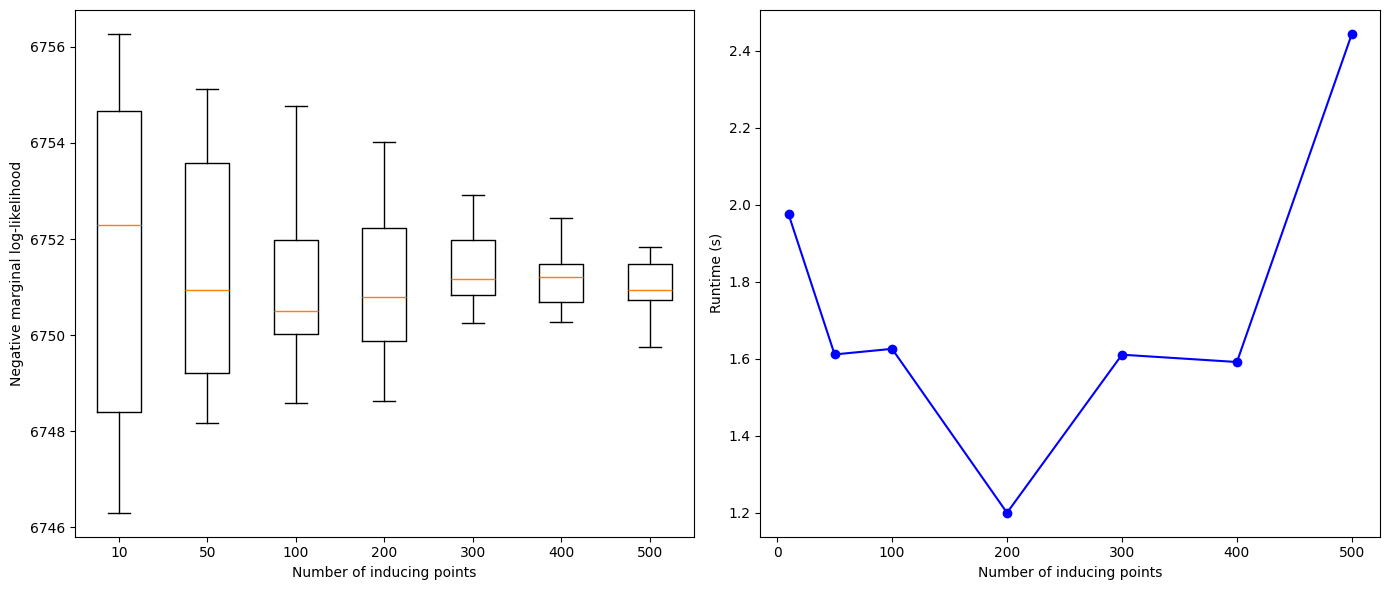

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for each row of the matrix
ax1.boxplot(matrix.T)  # Transpose matrix so that each row becomes a separate boxplot
ax1.set_title('')
ax1.set_xlabel('Number of inducing points')
ax1.set_ylabel('Negative marginal log-likelihood')
ax1.set_xticklabels(vector_ind_points)
# Lineplot for the mean of each row of matrix_t
row_means = matrix_t.mean(axis=1)
ax2.plot(vector_ind_points, row_means, marker='o', color='b')  # Lineplot
ax2.set_title('')
ax2.set_xlabel('Number of inducing points')
ax2.set_ylabel('Runtime (s)')

plt.tight_layout()
plt.show()

### m = 50 & m_v = 50

In [15]:
# Different number of inducing points for FITC preconditioner
vector_ind_points = [10, 50, 100, 200, 300, 400, 500]
# Number of repetitions
num_rep = 100
if toy:
    num_rep = 10
# Zero matrices
matrix = np.zeros((len(vector_ind_points), num_rep))
matrix_t = np.zeros((len(vector_ind_points), num_rep))
# Nested loop to iterate over both vectors
for i, val1 in enumerate(vector_ind_points):
    for j in range(0, num_rep):
        print(i)
        print(j)
        # Start the timer
        start_time = time.time()
        # FSVecchia with euclidean-based neighbor search
        model_fsva = gpb.GPModel(gp_coords=X_np, cov_function="gaussian_ard", 
                                 likelihood="bernoulli_logit",num_neighbors = 50,num_ind_points = 50,ind_points_selection = "kmeans++",
                                 matrix_inversion_method = "iterative", gp_approx="full_scale_vecchia",seed = 2)
        model_fsva.set_optim_params(params={"cg_preconditioner_type": "predictive_process_plus_diagonal",
                                            "piv_chol_rank": val1, "seed_rand_vec_trace": j+1})
        neg_fsva = model_fsva.neg_log_likelihood(cov_pars = np.array([1.0, 0.15, 0.30,0.45,0.60,0.75]), y = y_np)
        matrix[i, j] = neg_fsva
        # End the timer
        end_time = time.time()

        # Calculate elapsed time in seconds
        matrix_t[i, j] = end_time - start_time
        

0
0
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 0.064573 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 4 iterations 
0
1
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 0.065506 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points ha

[GPBoost] [Info] kNN time until = 0.10666 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 4 iterations 
1
6
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 0.074052 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 4 iterations 
1
7
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost]

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
3
1
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 0.064324 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
3
2
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 0.06494 
[GPBoost] [Info] End neighbour search r

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
4
6
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 0.065517 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
4
7
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 0.065549 
[GPBoost] [Info] End neighbour search 

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
6
1
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 0.060634 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
6
2
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 0.065002 
[GPBoost] [Info] End neighbour search 

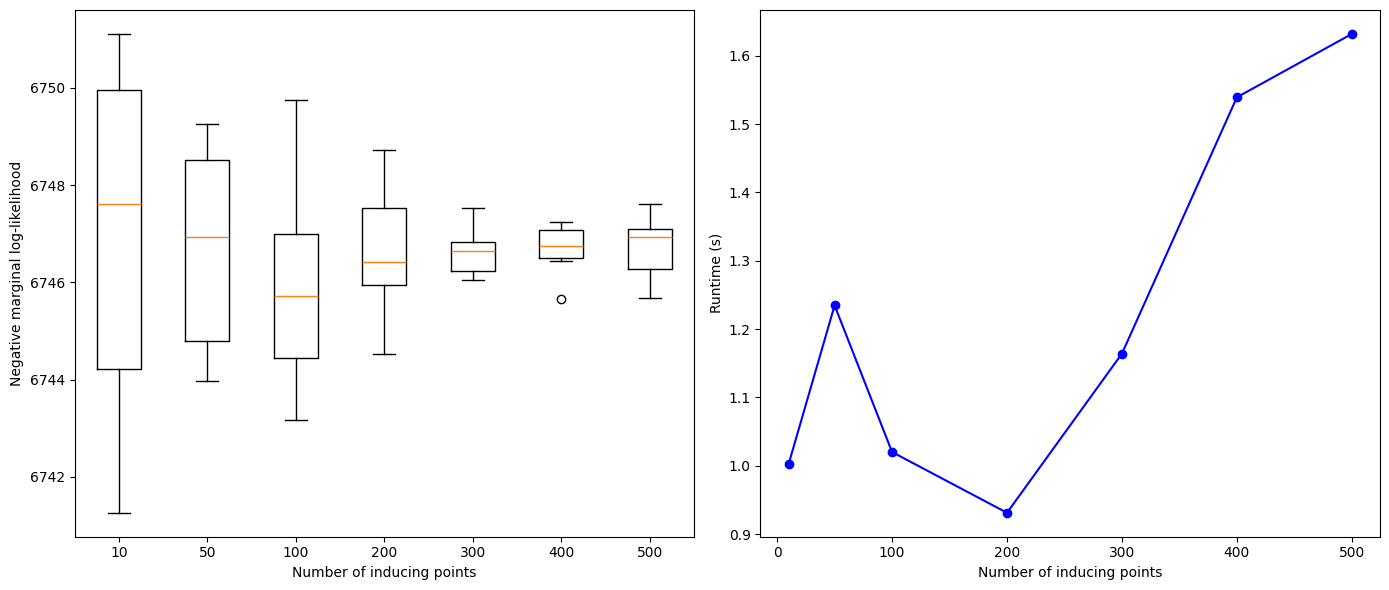

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for each row of the matrix
ax1.boxplot(matrix.T)  # Transpose matrix so that each row becomes a separate boxplot
ax1.set_title('')
ax1.set_xlabel('Number of inducing points')
ax1.set_ylabel('Negative marginal log-likelihood')
ax1.set_xticklabels(vector_ind_points)
# Lineplot for the mean of each row of matrix_t
row_means = matrix_t.mean(axis=1)
ax2.plot(vector_ind_points, row_means, marker='o', color='b')  # Lineplot
ax2.set_title('')
ax2.set_xlabel('Number of inducing points')
ax2.set_ylabel('Runtime (s)')

plt.tight_layout()
plt.show()

### m = 500 & m_v = 10

In [17]:
# Different number of inducing points for FITC preconditioner
vector_ind_points = [10, 50, 100, 200, 300, 400, 500]
# Number of repetitions
num_rep = 100
if toy:
    num_rep = 10
# Zero matrices
matrix = np.zeros((len(vector_ind_points), num_rep))
matrix_t = np.zeros((len(vector_ind_points), num_rep))
# Nested loop to iterate over both vectors
for i, val1 in enumerate(vector_ind_points):
    for j in range(0, num_rep):
        print(i)
        print(j)
        # Start the timer
        start_time = time.time()
        # FSVecchia with euclidean-based neighbor search
        model_fsva = gpb.GPModel(gp_coords=X_np, cov_function="gaussian_ard", 
                                 likelihood="bernoulli_logit",num_neighbors = 10,num_ind_points = 500,ind_points_selection = "kmeans++",
                                 matrix_inversion_method = "iterative", gp_approx="full_scale_vecchia",seed = 2)
        model_fsva.set_optim_params(params={"cg_preconditioner_type": "predictive_process_plus_diagonal",
                                            "piv_chol_rank": val1, "seed_rand_vec_trace": j+1})
        neg_fsva = model_fsva.neg_log_likelihood(cov_pars = np.array([1.0, 0.15, 0.30,0.45,0.60,0.75]), y = y_np)
        matrix[i, j] = neg_fsva
        # End the timer
        end_time = time.time()

        # Calculate elapsed time in seconds
        matrix_t[i, j] = end_time - start_time
        

0
0
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 0.031309 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
0
1
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 0.031486 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points ha

[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
1
5
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 0.030106 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
1
6
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 0.030442 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for det

[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
3
0
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 0.053499 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
3
1
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 0.060155 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for det

[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
4
5
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 0.031903 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
4
6
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 0.03146 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for dete

[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
6
0
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 0.029193 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
6
1
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 0.032127 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing point

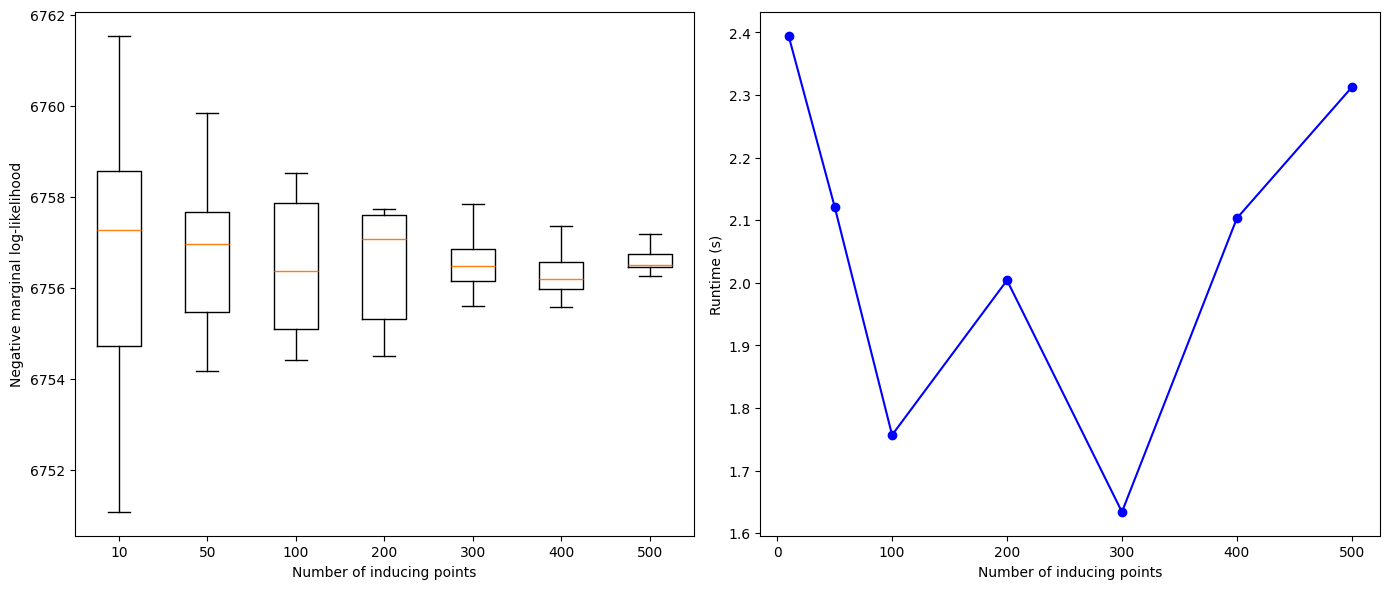

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for each row of the matrix
ax1.boxplot(matrix.T)  # Transpose matrix so that each row becomes a separate boxplot
ax1.set_title('')
ax1.set_xlabel('Number of inducing points')
ax1.set_ylabel('Negative marginal log-likelihood')
ax1.set_xticklabels(vector_ind_points)
# Lineplot for the mean of each row of matrix_t
row_means = matrix_t.mean(axis=1)
ax2.plot(vector_ind_points, row_means, marker='o', color='b')  # Lineplot
ax2.set_title('')
ax2.set_xlabel('Number of inducing points')
ax2.set_ylabel('Runtime (s)')

plt.tight_layout()
plt.show()

## Preconditioner Comparison (IVFDU & FITC)

### m = 200 & m_v = 30

In [47]:
# Different number of sample vectors
vector_sample = [10, 20, 50 ,100]
# Number of repetitions
num_rep = 100
if toy:
    num_rep = 10
# Zero matrices
matrix = np.zeros((len(vector_sample), num_rep))
matrix_t = np.zeros((len(vector_sample), num_rep))
matrix1 = np.zeros((len(vector_sample), num_rep))
matrix1_t = np.zeros((len(vector_sample), num_rep))
# Nested loop to iterate over both vectors
for i, val1 in enumerate(vector_sample):
    for j in range(0, num_rep):
        print(i)
        print(j)
        # Start the timer
        start_time = time.time()
        # FSVecchia with euclidean-based neighbor search
        model_fsva = gpb.GPModel(gp_coords=X_np, cov_function="gaussian_ard", 
                                 likelihood="bernoulli_logit",num_neighbors = 30,num_ind_points = 200,ind_points_selection = "kmeans++",
                                 matrix_inversion_method = "iterative", gp_approx="full_scale_vecchia",seed = 2)
        model_fsva.set_optim_params(params={"cg_preconditioner_type": "predictive_process_plus_diagonal",
                                            "piv_chol_rank": 200, "seed_rand_vec_trace": j+1, "num_rand_vec_trace": val1})
        neg_fsva = model_fsva.neg_log_likelihood(cov_pars = np.array([1.0, 0.15, 0.30,0.45,0.60,0.75]), y = y_np)
        matrix[i, j] = neg_fsva
        # End the timer
        end_time = time.time()

        # Calculate elapsed time in seconds
        matrix_t[i, j] = end_time - start_time
        
        # Start the timer
        start_time = time.time()
        # FSVecchia with euclidean-based neighbor search
        model_fsva = gpb.GPModel(gp_coords=X_np, cov_function="gaussian_ard", 
                                 likelihood="bernoulli_logit",num_neighbors = 30,num_ind_points = 200,ind_points_selection = "kmeans++",
                                 matrix_inversion_method = "iterative", gp_approx="full_scale_vecchia",seed = 2)
        model_fsva.set_optim_params(params={"cg_preconditioner_type": "Bt_Sigma_inv_plus_W_B",
                                            "seed_rand_vec_trace": j+1, "num_rand_vec_trace": val1})
        neg_fsva = model_fsva.neg_log_likelihood(cov_pars = np.array([1.0, 0.15, 0.30,0.45,0.60,0.75]), y = y_np)
        matrix1[i, j] = neg_fsva
        # End the timer
        end_time = time.time()

        # Calculate elapsed time in seconds
        matrix1_t[i, j] = end_time - start_time
        

0
0
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 18.0593 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 17.1781 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
0
1
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 19.6811 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 10.8494 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
0
10
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start ne

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.87336 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 6.63188 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
0
19
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start ne

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.51621 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 4.53785 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
0
28
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start ne

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 8.55148 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.85298 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
0
37
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start ne

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 4.29004 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 5.33294 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
0
46
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start ne

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.48125 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.31287 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
0
55
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start ne

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 4.29244 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 6.12954 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
0
64
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start ne

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.71579 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.93029 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
0
73
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start ne

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.94933 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.14007 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
0
82
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start ne

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.09807 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 11.1772 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
0
91
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start ne

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.91214 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.92883 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
1
0
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start nei

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.74838 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.99284 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
1
9
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start nei

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.9209 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 5.62519 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
1
18
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start nei

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 9.00702 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.59861 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
1
27
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start ne

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.5743 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.76447 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
1
36
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start nei

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.84311 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.75955 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
1
45
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start ne

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 7.02583 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 4.91545 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
1
54
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start ne

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.23441 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 5.63197 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
1
63
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start ne

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 4.72172 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 6.16927 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
1
72
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start ne

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.25267 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.93551 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
1
81
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start ne

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 5.98397 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.89502 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
1
90
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start ne

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 4.10381 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 5.98655 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
1
99
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start ne

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.89108 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.6809 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
2
8
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neig

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.98285 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.16672 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
2
17
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start ne

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 4.56696 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.14876 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
2
26
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start ne

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.17931 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.86794 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
2
35
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start ne

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.58051 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.55108 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
2
44
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start ne

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.74722 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 6.15232 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
2
53
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start ne

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.31118 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 4.48269 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
2
62
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start ne

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.31044 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 4.66073 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
2
71
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start ne

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 4.04052 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 4.53822 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
2
80
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start ne

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 4.1255 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.38637 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
2
89
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start nei

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.60299 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.34332 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
2
98
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start ne

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 4.38284 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.47708 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
3
7
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start nei

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.52729 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.65497 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
3
16
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start ne

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.82266 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.52462 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
3
25
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start ne

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 4.75487 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.62066 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
3
34
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start ne

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 5.0386 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.6891 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
3
43
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neig

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.51797 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.12368 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
3
52
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start ne

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.32375 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.93075 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
3
61
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start ne

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.65884 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.32155 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
3
70
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start ne

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 4.69292 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 4.1437 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
3
79
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start nei

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 4.34664 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.3583 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
3
88
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start nei

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.59593 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.75519 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
3
97
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start ne

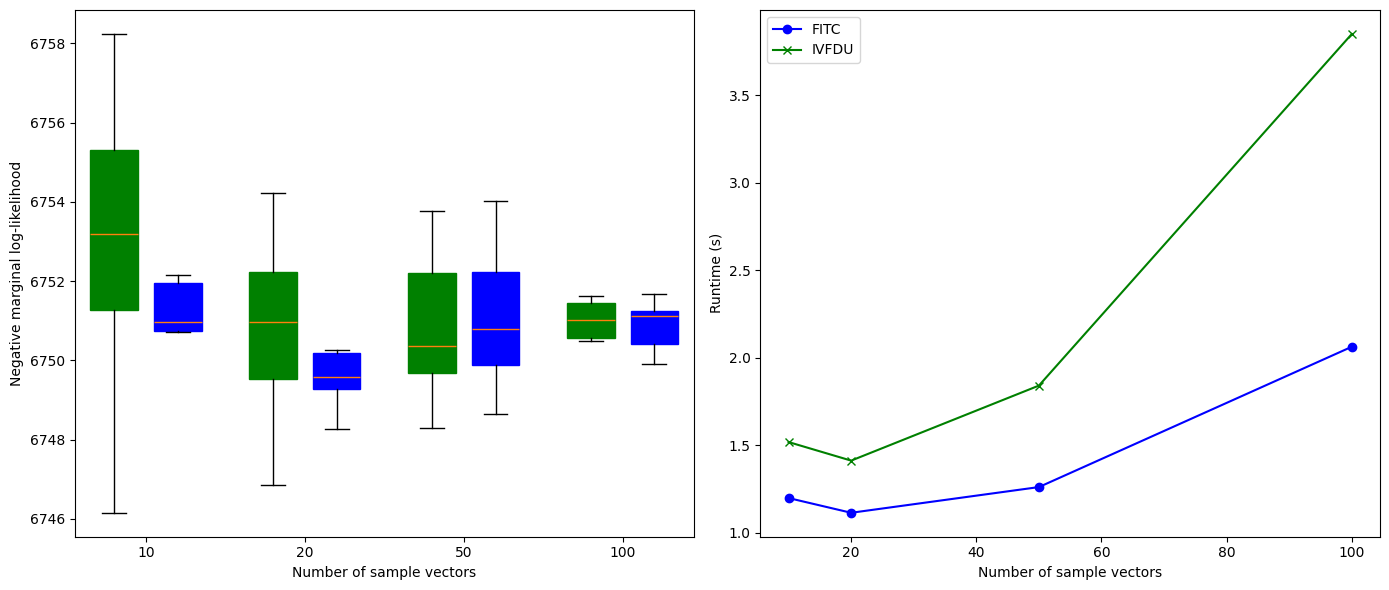

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))


# Boxplot for matrix at position 1 (blue)
ax1.boxplot(matrix.T, patch_artist=True, boxprops=dict(facecolor='b', color='b'), 
            positions=np.array(range(len(matrix)))*2 + 0.4, sym = '', widths = 0.6)

# Boxplot for matrix1 at position 2 (green)
ax1.boxplot(matrix1.T, patch_artist=True, boxprops=dict(facecolor='g', color='g'), 
            positions=np.array(range(len(matrix1)))*2 - 0.4, sym = '', widths = 0.6)
ax1.set_title('')
ax1.set_xlabel('Number of sample vectors')
ax1.set_ylabel('Negative marginal log-likelihood')
# Set the x-ticks to be in the middle of the two groups
# The middle of each pair of positions (1 and 2, 3 and 4, etc.)
xticks = np.array(range(len(matrix))) * 2   # Middle of the positions

# Set the labels to `vec_sample` and ensure they match the number of tick positions
ax1.set_xticks(xticks)
ax1.set_xticklabels(vector_sample)
#ax1.set_xticklabels(vector_sample)

# Lineplot for the mean of each row of matrix_t and matrix1_t
row_means_t = matrix_t.mean(axis=1)
row_means1_t = matrix1_t.mean(axis=1)

# Plot both line plots in the same axis
ax2.plot(vector_sample, row_means_t, marker='o', color='b', label='FITC')  # Lineplot for matrix_t
ax2.plot(vector_sample, row_means1_t, marker='x', color='g', label='IVFDU')  # Lineplot for matrix1_t
ax2.set_title('')
ax2.set_xlabel('Number of sample vectors')
ax2.set_ylabel('Runtime (s)')
ax2.legend()  # Add legend to differentiate the two line plots

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

### m = 50 & m_v = 50

In [49]:
# Different number of sample vectors
vector_sample = [10, 20, 50 ,100]
# Number of repetitions
num_rep = 100
if toy:
    num_rep = 10
# Zero matrices
matrix = np.zeros((len(vector_sample), num_rep))
matrix_t = np.zeros((len(vector_sample), num_rep))
matrix1 = np.zeros((len(vector_sample), num_rep))
matrix1_t = np.zeros((len(vector_sample), num_rep))
# Nested loop to iterate over both vectors
for i, val1 in enumerate(vector_sample):
    for j in range(0, num_rep):
        print(i)
        print(j)
        # Start the timer
        start_time = time.time()
        # FSVecchia with euclidean-based neighbor search
        model_fsva = gpb.GPModel(gp_coords=X_np, cov_function="gaussian_ard", 
                                 likelihood="bernoulli_logit",num_neighbors = 50,num_ind_points = 50,ind_points_selection = "kmeans++",
                                 matrix_inversion_method = "iterative", gp_approx="full_scale_vecchia",seed = 2)
        model_fsva.set_optim_params(params={"cg_preconditioner_type": "predictive_process_plus_diagonal",
                                            "piv_chol_rank": 200, "seed_rand_vec_trace": j+1, "num_rand_vec_trace": val1})
        neg_fsva = model_fsva.neg_log_likelihood(cov_pars = np.array([1.0, 0.15, 0.30,0.45,0.60,0.75]), y = y_np)
        matrix[i, j] = neg_fsva
        # End the timer
        end_time = time.time()

        # Calculate elapsed time in seconds
        matrix_t[i, j] = end_time - start_time
        
        # Start the timer
        start_time = time.time()
        # FSVecchia with euclidean-based neighbor search
        model_fsva = gpb.GPModel(gp_coords=X_np, cov_function="gaussian_ard", 
                                 likelihood="bernoulli_logit",num_neighbors = 50,num_ind_points = 50,ind_points_selection = "kmeans++",
                                 matrix_inversion_method = "iterative", gp_approx="full_scale_vecchia",seed = 2)
        model_fsva.set_optim_params(params={"cg_preconditioner_type": "Bt_Sigma_inv_plus_W_B",
                                            "seed_rand_vec_trace": j+1, "num_rand_vec_trace": val1})
        neg_fsva = model_fsva.neg_log_likelihood(cov_pars = np.array([1.0, 0.15, 0.30,0.45,0.60,0.75]), y = y_np)
        matrix1[i, j] = neg_fsva
        # End the timer
        end_time = time.time()

        # Calculate elapsed time in seconds
        matrix1_t[i, j] = end_time - start_time
        

0
0
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.33311 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.24453 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
0
1
[GPBoost] [Info] Starting kmeans++ algorithm for deter

[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.34516 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
0
9
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.50601 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info

[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.25798 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
0
18
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.17691 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: fi

[GPBoost] [Info] kNN time until = 3.10641 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.69337 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
0
27
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.73312 
[GPBoost] [Inf

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.79358 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.64733 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
0
36
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[G

[GPBoost] [Info] kNN time until = 3.16281 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
0
44
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 4.23172 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.34038 
[GPBoost] [Inf

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.21098 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
0
53
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 5.89115 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[G

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.18787 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
0
62
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 4.63711 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[G

[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.33479 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.09983 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
0
71
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Inf

[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
0
79
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.34038 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.73904 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: fi

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.67106 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
0
88
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 5.53097 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[G

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.13347 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
0
97
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.08309 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[G

[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.68 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.46588 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
1
6
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] s

[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
1
14
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.04784 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.14788 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: fi

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.21234 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
1
23
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.16591 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[G

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.03935 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
1
32
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.07264 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[G

[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.00716 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.11802 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
1
41
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Inf

[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
1
49
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.04815 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.09283 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: fi

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.96502 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
1
58
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.02854 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[G

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 4.67039 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
1
67
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.97276 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[G

[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 4.2394 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.57317 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
1
76
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info

[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
1
84
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.96901 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.87851 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: fi

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.56844 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
1
93
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.95073 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[G

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.77381 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
2
2
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.95164 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GP

[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.80019 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 4.25883 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
2
11
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Inf

[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
2
19
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.13372 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 4.3992 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: fin

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 4.0477 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
2
28
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.68676 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GP

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.53343 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
2
37
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.57033 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[G

[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 4.07392 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 4.55424 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
2
46
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Inf

[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
2
54
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.44168 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.56119 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: fi

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.45437 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
2
63
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.39642 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[G

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.50652 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
2
72
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.54991 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[G

[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.18918 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.68326 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
2
81
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Inf

[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
2
89
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.45736 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.27898 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: fi

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.46895 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
2
98
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.56881 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[G

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.61867 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
3
7
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.40475 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GP

[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.75014 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.9789 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
3
16
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info

[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
3
24
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.76833 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.40257 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: fi

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.26548 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
3
33
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.18679 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[G

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.36939 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
3
42
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.35129 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[G

[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.03513 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.06345 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
3
51
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Inf

[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
3
59
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.03695 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.94264 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: fi

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.01717 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
3
68
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.22155 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[G

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.09835 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
3
77
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.06189 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[G

[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.15173 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.11039 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
3
86
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Inf

[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
3
94
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.15366 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.17209 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: fi

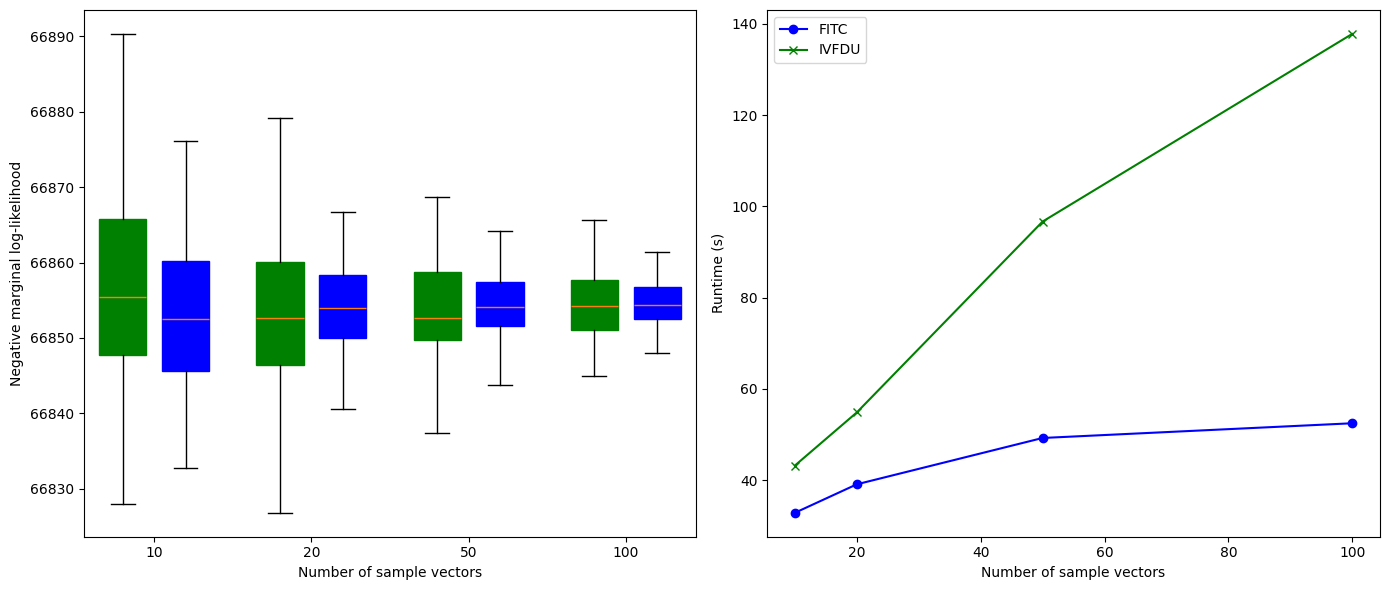

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))


# Boxplot for matrix at position 1 (blue)
ax1.boxplot(matrix.T, patch_artist=True, boxprops=dict(facecolor='b', color='b'), 
            positions=np.array(range(len(matrix)))*2 + 0.4, sym = '', widths = 0.6)

# Boxplot for matrix1 at position 2 (green)
ax1.boxplot(matrix1.T, patch_artist=True, boxprops=dict(facecolor='g', color='g'), 
            positions=np.array(range(len(matrix1)))*2 - 0.4, sym = '', widths = 0.6)
ax1.set_title('')
ax1.set_xlabel('Number of sample vectors')
ax1.set_ylabel('Negative marginal log-likelihood')
# Set the x-ticks to be in the middle of the two groups
# The middle of each pair of positions (1 and 2, 3 and 4, etc.)
xticks = np.array(range(len(matrix))) * 2   # Middle of the positions

# Set the labels to `vec_sample` and ensure they match the number of tick positions
ax1.set_xticks(xticks)
ax1.set_xticklabels(vector_sample)
#ax1.set_xticklabels(vector_sample)

# Lineplot for the mean of each row of matrix_t and matrix1_t
row_means_t = matrix_t.mean(axis=1)
row_means1_t = matrix1_t.mean(axis=1)

# Plot both line plots in the same axis
ax2.plot(vector_sample, row_means_t, marker='o', color='b', label='FITC')  # Lineplot for matrix_t
ax2.plot(vector_sample, row_means1_t, marker='x', color='g', label='IVFDU')  # Lineplot for matrix1_t
ax2.set_title('')
ax2.set_xlabel('Number of sample vectors')
ax2.set_ylabel('Runtime (s)')
ax2.legend()  # Add legend to differentiate the two line plots

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

### m = 500 & m_v = 10

In [53]:
# Different number of sample vectors
vector_sample = [10, 20, 50 ,100]
# Number of repetitions
num_rep = 100
if toy:
    num_rep = 10
# Zero matrices
matrix = np.zeros((len(vector_sample), num_rep))
matrix_t = np.zeros((len(vector_sample), num_rep))
matrix1 = np.zeros((len(vector_sample), num_rep))
matrix1_t = np.zeros((len(vector_sample), num_rep))
# Nested loop to iterate over both vectors
for i, val1 in enumerate(vector_sample):
    for j in range(0, num_rep):
        print(i)
        print(j)
        # Start the timer
        start_time = time.time()
        # FSVecchia with euclidean-based neighbor search
        model_fsva = gpb.GPModel(gp_coords=X_np, cov_function="gaussian_ard", 
                                 likelihood="bernoulli_logit",num_neighbors = 10,num_ind_points = 500,ind_points_selection = "kmeans++",
                                 matrix_inversion_method = "iterative", gp_approx="full_scale_vecchia",seed = 2)
        model_fsva.set_optim_params(params={"cg_preconditioner_type": "predictive_process_plus_diagonal",
                                            "piv_chol_rank": 200, "seed_rand_vec_trace": j+1, "num_rand_vec_trace": val1})
        neg_fsva = model_fsva.neg_log_likelihood(cov_pars = np.array([1.0, 0.15, 0.30,0.45,0.60,0.75]), y = y_np)
        matrix[i, j] = neg_fsva
        # End the timer
        end_time = time.time()

        # Calculate elapsed time in seconds
        matrix_t[i, j] = end_time - start_time
        
        # Start the timer
        start_time = time.time()
        # FSVecchia with euclidean-based neighbor search
        model_fsva = gpb.GPModel(gp_coords=X_np, cov_function="gaussian_ard", 
                                 likelihood="bernoulli_logit",num_neighbors = 10,num_ind_points = 500,ind_points_selection = "kmeans++",
                                 matrix_inversion_method = "iterative", gp_approx="full_scale_vecchia",seed = 2)
        model_fsva.set_optim_params(params={"cg_preconditioner_type": "Bt_Sigma_inv_plus_W_B",
                                            "seed_rand_vec_trace": j+1, "num_rand_vec_trace": val1})
        neg_fsva = model_fsva.neg_log_likelihood(cov_pars = np.array([1.0, 0.15, 0.30,0.45,0.60,0.75]), y = y_np)
        matrix1[i, j] = neg_fsva
        # End the timer
        end_time = time.time()

        # Calculate elapsed time in seconds
        matrix1_t[i, j] = end_time - start_time
        

0
0
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.39763 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.81006 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
0
1
[GPBoost] [Info] Starting kmeans++ algorithm for deter

[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.17793 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
0
9
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.72777 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info

[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.97042 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
0
18
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.47124 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: fi

[GPBoost] [Info] kNN time until = 2.63012 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.22544 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
0
27
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.16993 
[GPBoost] [Inf

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.44766 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.29638 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
0
36
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[G

[GPBoost] [Info] kNN time until = 2.9591 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
0
44
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.02404 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.96418 
[GPBoost] [Info

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.32738 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
0
53
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.38267 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[G

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 6.68847 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
0
62
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 6.73577 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[G

[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.78884 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.57849 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
0
71
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Inf

[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
0
79
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.36626 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.09208 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: fi

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.57072 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
0
88
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.63882 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[G

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.3568 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
0
97
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.65163 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GP

[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.74024 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.38527 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
1
6
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info

[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
1
14
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.82433 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 5.89609 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: fi

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.09752 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
1
23
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.22146 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[G

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 8.31394 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
1
32
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 7.31671 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[G

[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.57463 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.28077 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
1
41
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Inf

[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
1
49
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.17059 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.33745 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: fi

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.1392 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
1
58
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.27354 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GP

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.10313 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
1
67
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 1.98377 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[G

[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.50016 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.296 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
1
76
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info]

[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
1
84
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.48265 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.66742 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: fi

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.31255 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
1
93
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.57034 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[G

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.80655 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
2
2
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.85898 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GP

[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.60819 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.03852 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
2
11
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Inf

[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
2
19
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.74484 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.07191 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: fi

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.66893 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
2
28
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.38438 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[G

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.17912 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
2
37
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.54108 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[G

[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.76067 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.58173 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
2
46
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Inf

[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
2
54
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.23535 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.62637 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: fi

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.06944 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
2
63
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.48898 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[G

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.03087 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
2
72
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.45272 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[G

[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.91574 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.75325 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
2
81
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Inf

[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
2
89
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.22591 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 1.98182 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: fi

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 9.01524 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
2
98
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 7.89355 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[G

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.60899 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
3
7
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.12337 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GP

[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.08533 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.76468 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
3
16
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Inf

[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
3
24
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.77061 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.83176 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: fi

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.39238 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
3
33
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.46612 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[G

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 3.57437 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
3
42
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.34335 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[G

[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 1.98705 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.78154 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
3
51
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Inf

[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
3
59
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 1.98814 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.59275 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: fi

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.0997 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
3
68
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.61027 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GP

[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.58465 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
3
77
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.53515 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[G

[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.18979 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.07489 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
3
86
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Inf

[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
3
94
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.10522 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Testa
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: finished after 3 iterations 
[GPBoost] [Info] Starting kmeans++ algorithm for determining inducing points 
[GPBoost] [Info] Test11
[GPBoost] [Info] Inducing points have been determined 
[GPBoost] [Info] Start neighbour search re
[GPBoost] [Info] start
[GPBoost] [Info] kNN time until = 2.09446 
[GPBoost] [Info] End neighbour search re
[GPBoost] [Info] FindModePostRandEffCalcMLLFSAVecchia: fi

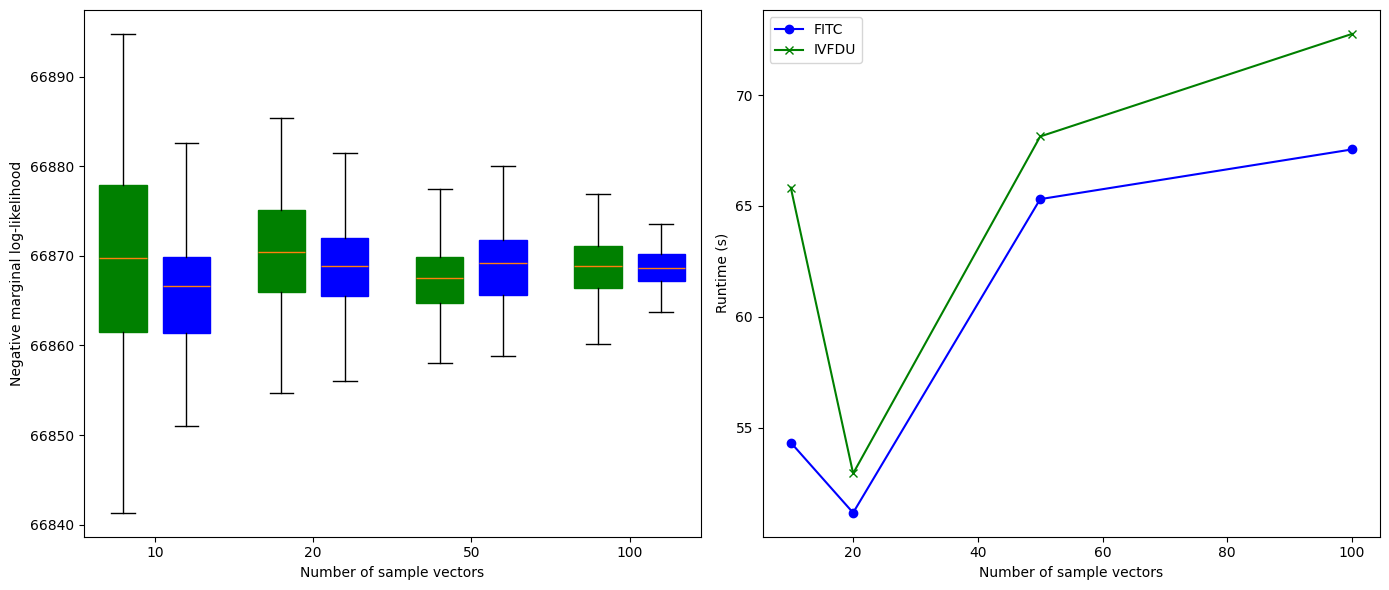

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))


# Boxplot for matrix at position 1 (blue)
ax1.boxplot(matrix.T, patch_artist=True, boxprops=dict(facecolor='b', color='b'), 
            positions=np.array(range(len(matrix)))*2 + 0.4, sym = '', widths = 0.6)

# Boxplot for matrix1 at position 2 (green)
ax1.boxplot(matrix1.T, patch_artist=True, boxprops=dict(facecolor='g', color='g'), 
            positions=np.array(range(len(matrix1)))*2 - 0.4, sym = '', widths = 0.6)
ax1.set_title('')
ax1.set_xlabel('Number of sample vectors')
ax1.set_ylabel('Negative marginal log-likelihood')
# Set the x-ticks to be in the middle of the two groups
# The middle of each pair of positions (1 and 2, 3 and 4, etc.)
xticks = np.array(range(len(matrix))) * 2   # Middle of the positions

# Set the labels to `vec_sample` and ensure they match the number of tick positions
ax1.set_xticks(xticks)
ax1.set_xticklabels(vector_sample)
#ax1.set_xticklabels(vector_sample)

# Lineplot for the mean of each row of matrix_t and matrix1_t
row_means_t = matrix_t.mean(axis=1)
row_means1_t = matrix1_t.mean(axis=1)

# Plot both line plots in the same axis
ax2.plot(vector_sample, row_means_t, marker='o', color='b', label='FITC')  # Lineplot for matrix_t
ax2.plot(vector_sample, row_means1_t, marker='x', color='g', label='IVFDU')  # Lineplot for matrix1_t
ax2.set_title('')
ax2.set_xlabel('Number of sample vectors')
ax2.set_ylabel('Runtime (s)')
ax2.legend()  # Add legend to differentiate the two line plots

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()